## DAV 6150 Module 7 Assignment
-by Group Manling Yang, Xiaojia He

***
## Introduction
The purpose of this study is to find the best model to predict whether or not a given mortgage loan application is likely to be approved or denied. We'll conduct multiple logistic regression to predict the deny situation.  


**Variables:**

The original data set includes 7 categorical variables and 7 numerical variables.

There are 12 variables that can be used as independent variables. 

The 'deny' variable will serve as the dependent variable for our regression model. 

**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Data Cleaning

Step 4: Feature Engineering and Feature Selection

Step 5: Logistic Regression Creation

Step 6: Model Eveluation

Step 7: Conclusion

>For **Step 2**, the main components of EDA include:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Check the missing value
6. Check the correlation for each variables


>For **Step 3**, it consists of 6 stages:
1. Drop the missing value row
2. Check Outliers
3. Check deplicated data
4. Rerun EDA

>For **Step 4**, we'll perform:
1. Encode categorical data - create dummy variables
2. Split data into training and testing subsets
3. Scaling numerical values using Standard Scale (except dummy variables)
4. Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - 4c. Reduce features further based on the correlation coefficients from step 4a and VIFs, including Check VIF of all features and Drop feature based on correlation coefficients and VIFs (need all VIFs<10). Then, Set up a final train and test datasets with the best features

>For **Step 5**,we'll perform Logistic Regression.
The procedures of this step include:
- 1. Model creation
- 2. Test the model to predict using the test dataset
- 3. Use Statsmodels summary to get the final model's R^2, P value, intercept, and coefficients.
- 4. Use the final Model for Prediction



**Variable Descriptions:**
1. dir: debt payments to total income ratio
2. hir: housing expenses to income ratio
3. lvr: ratio of size of loan to assessed value of property
4. ccs: consumer credit score from 1 to 6 (a low value being a good score)
5. mcs: mortgage credit score from 1 to 4 (a low value being a good score)
6. pbcr: public bad credit record 
7. dmi: if denied mortgage insurance 
8. self if self employed 
9. single If the applicant is single 
10. uria: 1989 Massachusetts unemployment rate in the applicant's industry
11. condominium: if the unit is a condominium. The mortgage rates on condominiums are usually higher than what the same borrower would pay if they were purchasing a single-family home on similar terms. That's because condominium mortgages are considered somewhat riskier loans than are mortgages for single-family homes. So, it is a valid attribute.
12. black If the applicant is black 
13. deny: If mortgage application is denied 

In [69]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github, we find that there are no columns' names. So, we give the names for each columns base on the information from https://archive.ics.uci.edu/ml/datasets/Automobile.

`.head()` returns the first 5 rows of the dataset. 

In [70]:
# read datasource from Github and add column name
df = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/DAV-6150/master/M-DataSource/M7_Data.csv")

# To display the top 5 rows
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Check the missing value
6. Check the correlation for each variables


#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset. My output is (205, 26), meaning the dataset has 205 rows and 26 columns.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.


In [71]:
# check the shape for the dataframe
df.shape

(2381, 14)

In [72]:
#drop the first column

df =df.drop(columns=['Unnamed: 0'])
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [73]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dir,2381.0,0.330814,0.107235,0.00,0.28000,0.330000,0.370000,3.00
hir,2381.0,0.255346,0.096635,0.00,0.21400,0.260000,0.298800,3.00
lvr,2381.0,0.737760,0.178715,0.02,0.65285,0.779412,0.868421,1.95
ccs,2381.0,2.116387,1.666370,1.00,1.00000,1.000000,2.000000,6.00
mcs,2381.0,1.721008,0.537169,1.00,1.00000,2.000000,2.000000,4.00
uria,2381.0,3.774496,2.026636,1.80,3.10000,3.200000,3.900000,10.60
comdominiom,2381.0,0.288114,0.452980,0.00,0.00000,0.000000,1.000000,1.00


In [74]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()


df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues
dir,float64,520,0,2381,1
hir,float64,501,0,2381,3
lvr,float64,1538,0,2381,0
ccs,float64,7,0,2381,0
mcs,float64,5,0,2381,0
pbcr,object,2,1,2380,0
dmi,object,2,0,2381,0
self,object,2,1,2380,0
single,object,2,0,2381,0
uria,float64,11,0,2381,0


#### Findings:

>1. The dataset consists of 14 variables and 2381 observations.
2. There is only 1 missing value in column self and pbcr.
3. The types of data are object, integer, and float, and some columns are not of the correct data type.
4. There is no negative values.

#### 2. Check numerical and categorical columns


In [75]:
# since comdominiom is categorical variable, we will deal with it separately 

df11 =df.drop(columns=['comdominiom'])

numerical_columns = []
categorical_columns = []

for i in df11.columns[:]:
    if(df11[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print('Numerical variables:',numerical_columns)
print('Categorical variables:',categorical_columns)

Numerical variables: ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']
Categorical variables: ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']


#### Findings:
> 1. We can know the numerical variables of the original dataset are 6 attributes, including dir, hir, lvr, ccs, mcs, uria.
2. Although the data type of comdominiom is numerical, it is the categorical data. 0 represent the unit is not comdominiom, 1 represent the unit is comdominiom.
3. The categorical variables of the original dataset include 16 attributes, including pbcr, dmi, self,single,black, deny and comdominiom.

#### 3. Visualize numerical columns

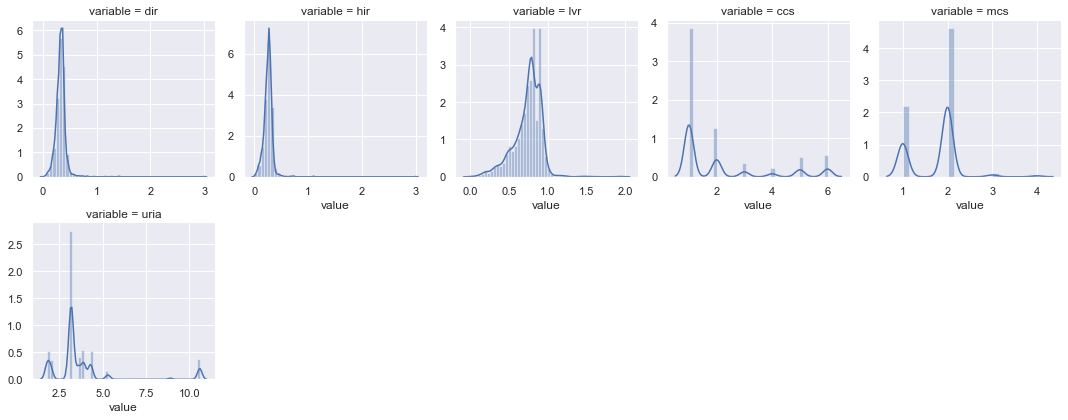

In [76]:
# Distributions for each of numerical variables.
nd = pd.melt(df[numerical_columns])
n1 = sns.FacetGrid (nd, col='variable', col_wrap=5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1


#### Findings: 
>1. From this visualization, we can see that dir and hir have outliers. 
2. Most of people have great consumer credit score(ccs), 1 or 2. 
3. Most of people have great mortgage credit score(mcs), 1 or 2.
4. The main Massachusetts unemployment rate for each applicants' insduries in 1989 were around 3.

#### 4. Visualize categorical columns

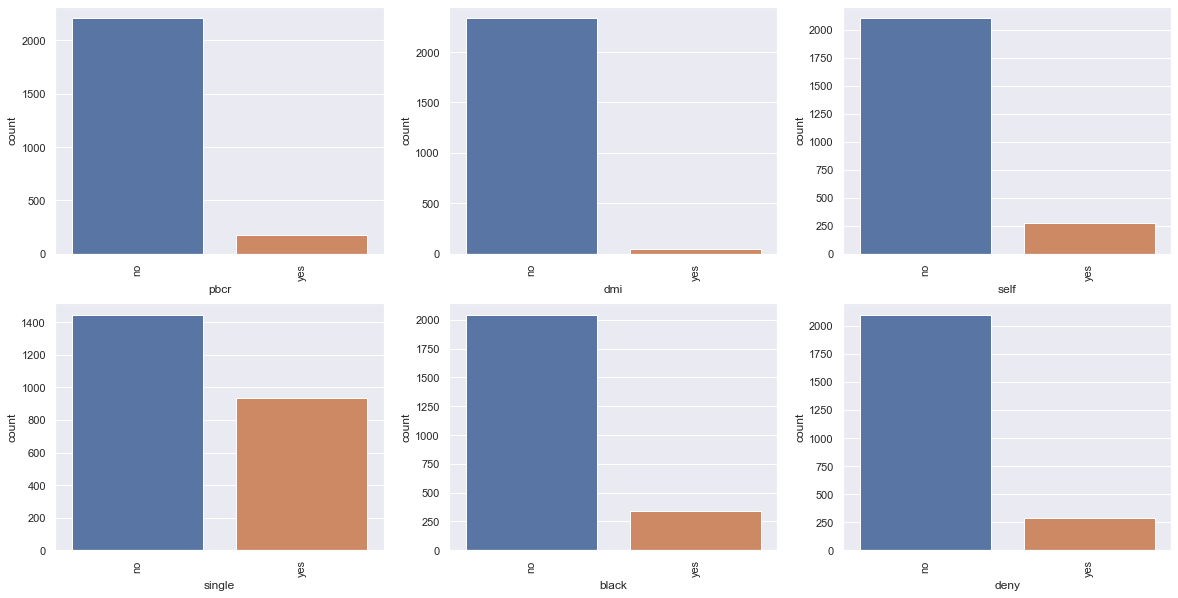

In [77]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

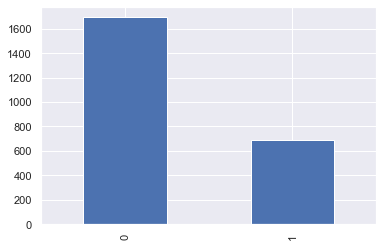

In [78]:
# create the bar chart for categorical value comdominiom
df['comdominiom'].value_counts().plot(kind='bar')

#### Findings: 
>1. In categorical arrtibutes, most of applicants'situations are no. It means that most applicants are single, not black, do not self employed, do not have public bad credit record, or do not have mortage insurance. Many applicants may apply one or more features. 
2. There are less people get the mortage application denied. Most of applicants get mortage loan successfully.
3. There are more not single applicants to apply mortage loan than single people.

#### 5. Check the missing value

In [79]:
 
# Show missing value
miss = df.isnull().sum()
#miss = miss[miss > 0]
#miss.sort_values(inplace=True)
miss

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

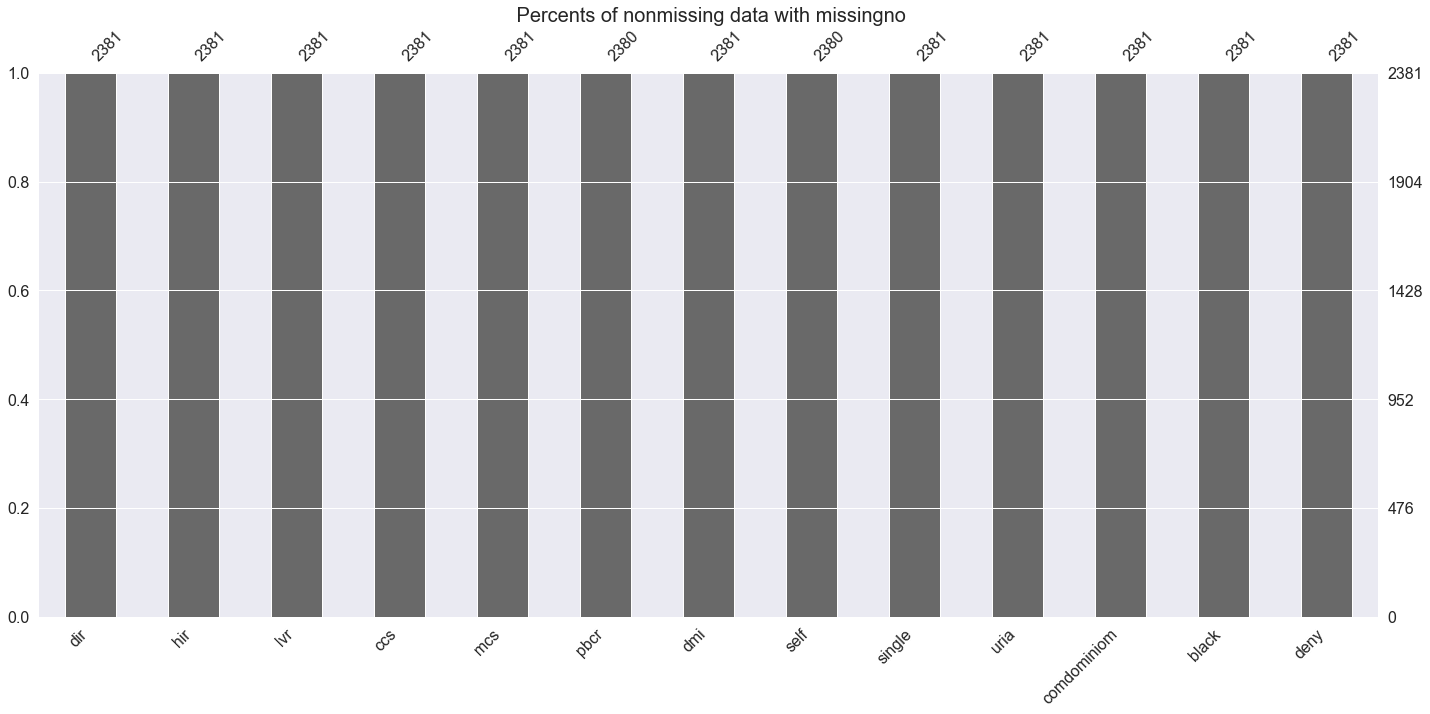

In [80]:
# create the bar charts to show percents of nonmissing databy missingo function
msno.bar(df)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

In [81]:
# percentage of colimns with missing values
miss = df.isnull().sum()/len(df)
# show the percentage of missing values for specific columns that contains missing values
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

pbcr    0.00042
self    0.00042
dtype: float64

#### Findings: 
>1. There is only one missing value in cloumn pbcr and self. 
2. The percentage of missing value is less than 1%.

#### 6. Correlation

Text(0.5, 1.0, 'Figure 5: Correlations')

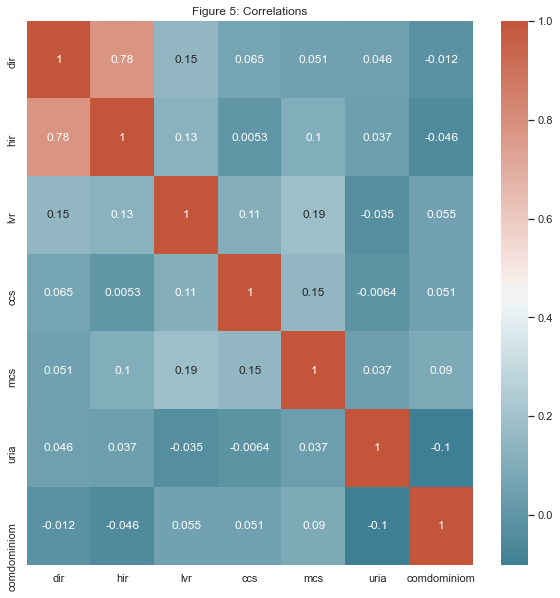

In [82]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,10))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

#### Findings: 
>1. There are strong relationship between hir and dir. 
2. There are weak relationships (correlationno more than 0.2) in three groups which are between dir and lvr, mcs and ccs, mcs and lvr. 
3. There are no obvious relationship in dirrferent groups.

***
### Step 3: Data Cleaning
1. Drop the missing value row
2. Check Outliers
3. Check deplicated data
4. Rerun EDA


#### 1. Drop the missing value row
Consider there is only one row that contains missing value and the percentage of total dataset is less than 1%, we decide to drop the row.


In [83]:
# extract the rows that contain missing value 
null_data = df[df.isnull().any(axis=1)]
null_data

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [84]:
# drop the missing value row
df = df.dropna()

In [85]:
 
# Show missing value
miss = df.isnull().sum()
#miss = miss[miss > 0]
#miss.sort_values(inplace=True)
miss

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

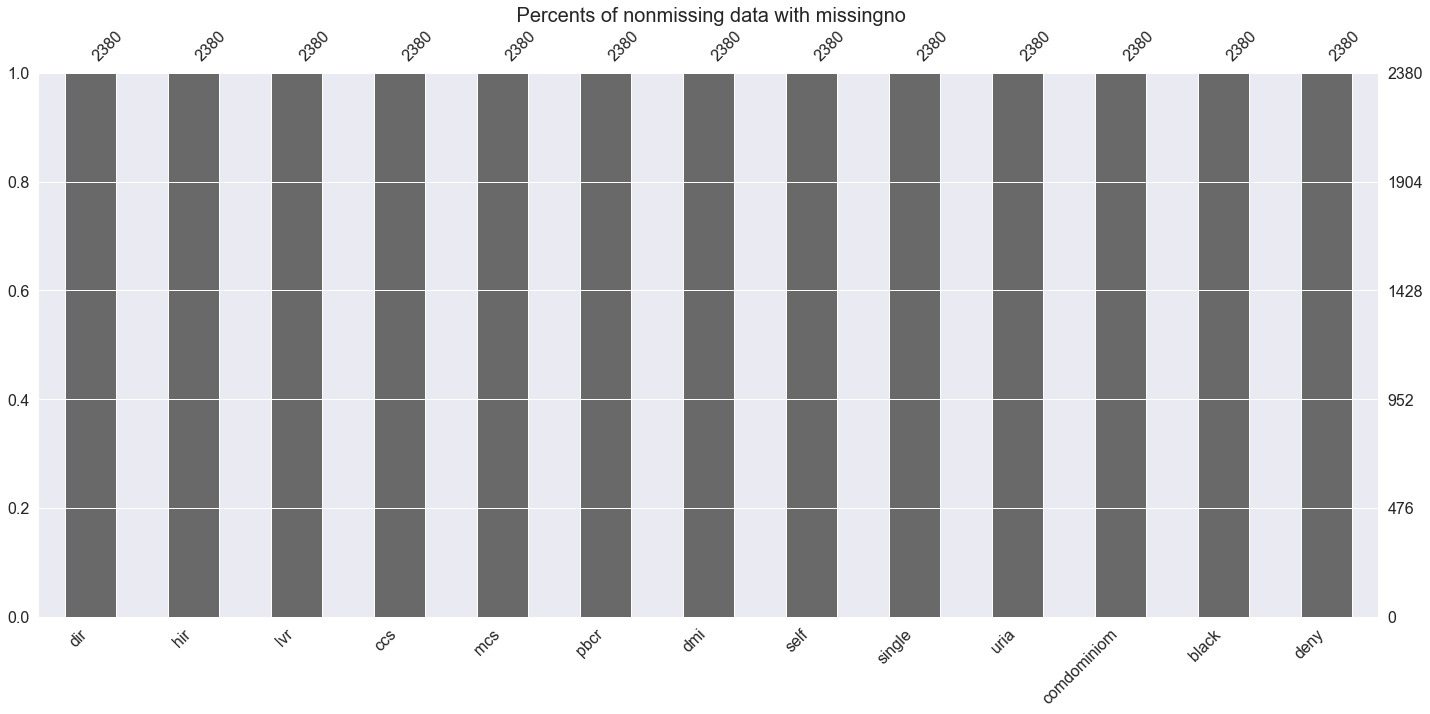

In [86]:
# recreate the bar charts to show percents of nonmissing databy missingo function
msno.bar(df)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

#### 4. Detect Outliers


In [87]:
# use standard deviation to find the outliers for each numerical columns
def remove_outliers(col_name):
    """
    Removing the outliers that are 2.5 standard deviations away from the mean.
    """
    return df[np.abs(df[col_name] - df[col_name].mean() ) > (2.5 * df[col_name].std() )]

In [88]:
# find all rows that have dir values whose values are > 2.5 standard deviations from the mean of data in that column
dir_outliers = remove_outliers('dir')
print('min:',dir_outliers.dir.min())
print('max',dir_outliers.dir.max())
print('number of outliers:',dir_outliers.shape[0])

min: 0.0
max 3.0
number of outliers: 28


According to the domain knowledge, over 50% debet income ration is high liabilities. In addition, hir and dir have high correlation, so we do not delete the outliers.

In [89]:
# find all rows that have lvr values whose values are > 2.5 standard deviations from the mean of data in that column
lvr_outliers = remove_outliers('lvr')
print('min:',lvr_outliers.lvr.min())
print('max',lvr_outliers.lvr.max())
print('number of outliers:', lvr_outliers.shape[0])

min: 0.02
max 1.95
number of outliers: 67


In [90]:
# find all rows that have hir values whose values are > 2.5 standard deviations from the mean of data in that column
hir_outliers = remove_outliers('hir')
print('min:',hir_outliers.hir.min())
print('max',hir_outliers.hir.max())
print('number of outliers:',hir_outliers.shape[0])

min: 0.0
max 3.0
number of outliers: 24


In [91]:
# find all rows that have ccs values whose values are > 2.5 standard deviations from the mean of data in that column
ccs_outliers = remove_outliers('ccs')
print('min:',ccs_outliers.ccs.min())
print('max',ccs_outliers.ccs.max())
print('number of outliers:',ccs_outliers.shape[0])

min: nan
max nan
number of outliers: 0


There are no outliers in column ccs.

In [92]:
# find all rows that have mcs values whose values are > 2.5 standard deviations from the mean of data in that column
mcs_outliers = remove_outliers('mcs')
print('min:',mcs_outliers.mcs.min())
print('max',mcs_outliers.mcs.max())
print('number of outliers:',mcs_outliers.shape[0])

min: 4.0
max 4.0
number of outliers: 21


mortgage credit score from 1 to 4, so the outliers of mcs is valid and do not need to be removed.

In [93]:
# find all rows that have uria values whose values are > 2.5 standard deviations from the mean of data in that column
uria_outliers = remove_outliers('uria')
print('min:',uria_outliers.uria.min())
print('max',uria_outliers.uria.max())
print('number of outliers:',uria_outliers.shape[0])

min: 8.899999618999999
max 10.60000038
number of outliers: 175


Although there appear to be outliers, we decided do not to remove any of them. 

### 3. Rerun EDA

C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B7AA1C080>,
      dtype=object)

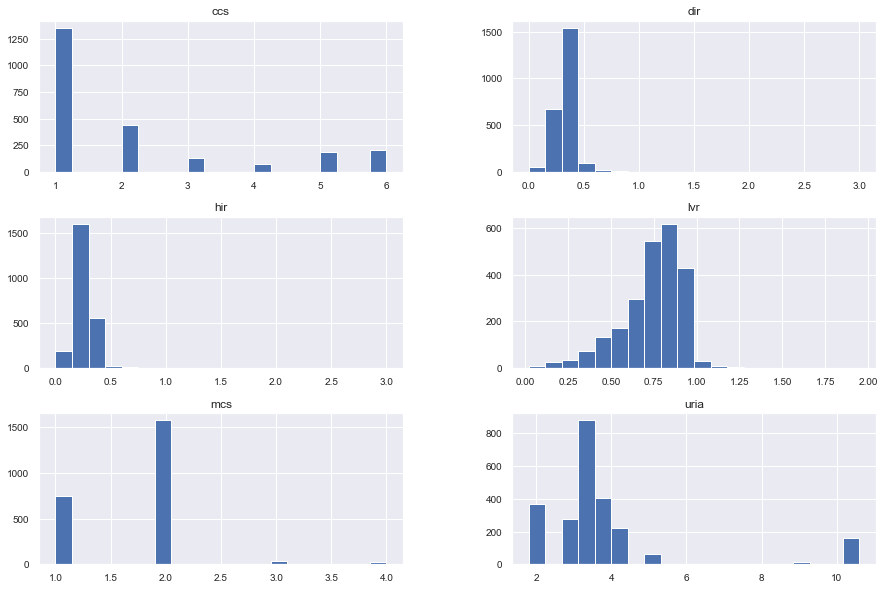

In [94]:
# create histogram for numerical columns
df01 = df[numerical_columns]
df01.hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)

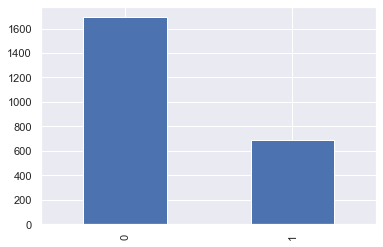

In [95]:
# create the bar chart for categorical value comdominiom
df['comdominiom'].value_counts().plot(kind='bar')

#### Findings: 
>There are almost same with pervious EDA results.

***
### Step 4: Feature Engineering and Feature Selection

For this step, we'll perform:
   1. create dummy variables
   2. Split data into training and testing subsets
   3. Scaling numerical values using Standard Scale (except dummy variables)
   4. Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - c. Reduce features further based on the results from the step 4a and VIFs, including Check VIF of all features and Drop feature based based on VIF. Then, Set up a final train and test datasets with the best features


#### 1. create dummy variables

We'll create dummy variables for categorical data and exclude the first dummy column.

The comdominiom has already to be dummy and numerical, we do not do anything for it.

>Steps:
1. define the categorical attributes taht we want to process
2. We'll define the list of categorical features that we want to process.
3. We'll create dummy variables using `get_dummies()`, and we'll exclude the first dummy column to avoid dependency among the variables by using `drop_first=True`.
. Results: the predictor variables increased from 13 to 10 after creating dummy variables.


In [96]:
# create dummy for the columns pbcr,dmi,self,single,black,and deny
df1= pd.get_dummies(df,columns=['pbcr','dmi','self','single','black','deny'], drop_first=True)
df1.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes,deny_yes
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0,0


#### 2. Split data into training and testing subsets

Before doing feature selection,we'll split data into training and testing subsets by using the `train_test_split` function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [97]:
# Create X and y
X = df1.drop(columns = "deny_yes")
y = df1[['deny_yes']]


In [98]:
# evaluate the model by splitting into train and test sets

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (1666, 12) (1666, 1)
Testing dataset shape: (714, 12) (714, 1)


#### 3. Scaling numerical values using Standard Scale (except dummy variables)

Since some variables have different scales, we'll use `StandardScaler` to remove the mean and scale the data to unit variance.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

We'll use `StandardScaler` for the train dataset, then do the same to the test dataset.


In [99]:
# set up numerical variables

Numerical_columns=['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']


In [100]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on the train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_train[i] = X_train[i].astype('float64')
    X_train[i] =  sc.fit_transform(X_train[i].values.reshape(-1,1))
    
X_train.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
2060,0.320568,0.705974,0.029044,-0.668449,0.531729,2.0,0,0,0,0,1,0
46,-0.537016,0.036318,0.338958,2.312376,0.531729,3.2,0,1,0,0,0,0
1161,-0.708533,-0.155012,-0.702182,-0.668449,0.531729,3.2,1,0,0,0,1,0
784,-0.526725,0.143464,-0.512334,1.120046,0.531729,3.2,1,0,0,0,1,1
105,0.149051,0.705974,1.063471,-0.668449,0.531729,3.9,0,0,1,0,1,0


In [101]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on th train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_test[i] = X_test[i].astype('float64')
    X_test[i] =  sc.fit_transform(X_test[i].values.reshape(-1,1))
    
X_test.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
2075,-0.377252,-0.591199,0.941267,-0.673675,0.492297,3.1,0,0,0,0,0,0
1981,1.644669,0.222034,0.594649,1.764875,0.492297,5.3,0,0,0,0,1,0
1597,1.398093,2.488424,-1.609046,-0.673675,-1.310268,3.6,1,0,0,0,0,0
1690,0.411790,-0.444551,-0.964415,-0.064038,0.492297,3.1,1,0,0,0,0,0
14,-1.807391,-1.377770,-2.088065,-0.673675,-1.310268,3.2,0,0,0,0,0,0


#### 4 Feature Selection  by using Correlation coefficients, RFECV, and VIFs. 

**a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds**

**Correlation Method**: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

In this case, an absolute correlation coefficient of >0.8 among two predictors indicates the presence of multicollinearity. 

Checking for multicollinearity is a very important step during the feature selection process. Multicollinearity can significantly reduce the model’s performance. Removing multicollinear features will both reduce the number of features and improve the model’s performance.


Text(0.5, 1.0, 'Figure 6: Correlations')

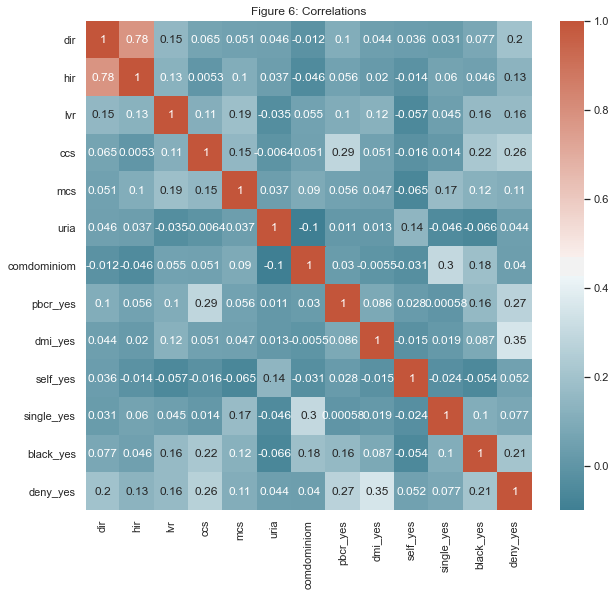

In [102]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,9))

corr = df1.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6: Correlations')

#### Findings: 
>1. From this visualization, we can obviously see that the dir and hir are the multicollinearity which have 0.78 correlation values. 
>2. We need to delete one from them. However, we don't know which one should be deleted.
>3. We'll use these r and VIF values later to decide which variable should be removed. 
4. According to the correlation, variable dr, ccs, pbcr, dmi, and black have the strongest relationships with deny even their correlations are no more than 0.36. These can be the first model exploratory variables.
5. The correlations of variable hir, lvr, and mcs are more than 0.1 and less than 0.2. 


#### 4b Select features by using Recursive feature elimination with cross-validation (RFECV)

RFE requires a specified number of features to keep, **however it is usually not known in advance how many features are valid**. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.

reference: https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(X_train, y_train)
cv_selector = RFECV(cv_estimator, cv=10, step=1)
cv_selector = cv_selector.fit(X_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 10
Best features : ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']


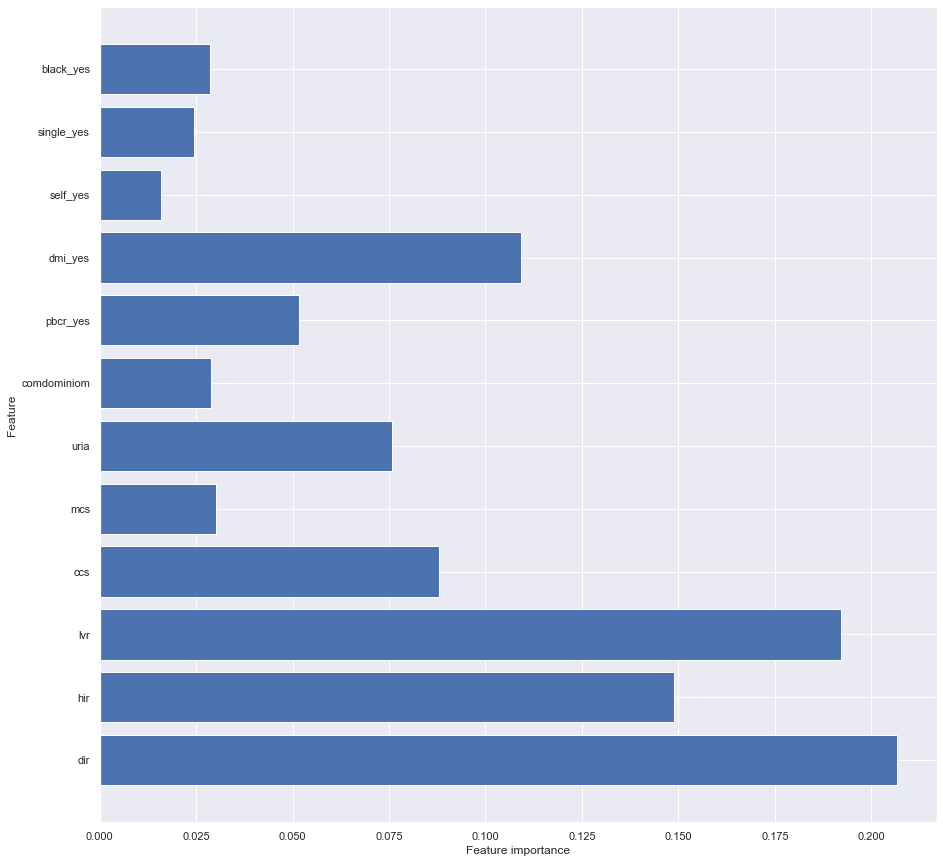

In [104]:
rfecv_features = [] 

for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

n_features = X_train.shape[1]
plt.figure(figsize=(15,15))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### Findings:
>1. Finally, the number of features is reduced to 10 from 13, and we have the name of those features. 
>2. The next step is to double check these features by using correlation r values and VIFs to see if there's high multicollinearity between correlated features. 


#### c Reduce features further based on the results from step 4b and VIFs

**VIF (Variance Inflation Factor) Method**: Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if our predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

We use the statsmodels `variance_inflation_factor` to calculate VIF. There are some guidelines we can use to determine whether our VIFs are in an acceptable range. A rule of thumb commonly used in practice is if a **VIF is > 10**, you have high multicollinearity. Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.


**Steps:**

>1. Check VIFs of all 10 features
2. Drop 'hir'and check VIF of the remaining features
3. Drop 'dir' and 'length', and check VIF of remaining features
4. Set up a final train and test datasets with the best features


**01. Use all 10 features to check VIF**

In [105]:
# narrow down the X_train to 10 features
X_train_new = X_train[['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']]
X_test_new = X_test[['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']]                      

In [106]:
from statsmodels.stats import outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check all 10 features
X3 = sm.add_constant(X_train_new)

# For each X, calculate VIF and save in dataframe
vif02 = pd.DataFrame()
vif02["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif02["features"] = X3.columns
vif02.round(1)

C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF Factor,features
0,5.4,const
1,2.9,dir
2,2.9,hir
3,1.1,lvr
4,1.2,ccs
5,1.1,mcs
6,1.0,uria
7,1.1,comdominiom
8,1.1,pbcr_yes
9,1.0,dmi_yes


#### Results:
>1. All VIF values look good.
>2. The dir and hir have the same VIF vaules.
>3. Although the hir and dir have good VIF vaules, considering they have higher correlation coefficient(r=0.78) which means they may be very multipcolinearity. we decide to drop one of them. 
>3. The next step is to drop 'hir' and 'dir' separately and then fit the models using the left 9 features.
>4. compare these two performance to decide whether we should drop 'dir' or 'hir' 



**02. Drop 'hir' and check VIF of the remaining 9 features**

In [107]:
# this train dataset consists of 17 features after removing 'curb_weight'
X_train_new02 = X_train[['dir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']]

X4 = sm.add_constant(X_train_new02)

# For each X, calculate VIF and save in dataframe
vif03 = pd.DataFrame()
vif03["VIF Factor"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif03["features"] = X4.columns
vif03.round(1)

,VIF Factor,features
0,5.4,const
1,1.0,dir
2,1.1,lvr
3,1.2,ccs
4,1.1,mcs
5,1.0,uria
6,1.0,comdominiom
7,1.1,pbcr_yes
8,1.0,dmi_yes
9,1.1,black_yes


**03. Drop 'dir' and check VIF of the remaining 9 features**

In [108]:
# this train dataset consists of 15 features after removing 'engine_size' and 'length'
X_train_new03 = X_train[[ 'hir','lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']]

X5 = sm.add_constant(X_train_new03)

# For each X, calculate VIF and save in dataframe
vif04 = pd.DataFrame()
vif04["VIF Factor"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif04["features"] = X5.columns
vif04.round(1)

,VIF Factor,features
0,5.4,const
1,1.0,hir
2,1.1,lvr
3,1.2,ccs
4,1.1,mcs
5,1.0,uria
6,1.1,comdominiom
7,1.1,pbcr_yes
8,1.0,dmi_yes
9,1.1,black_yes


#### Results:
>1. All VIF values look good.
>2. Comparing to these performances, most of the VIF values do not change, only comdominiom has a lower value(1.0) when we drop the 'hir' comparing to 1.1 when we drop 'dir'. So we ddecide to drop 'hir'.
>3. The next step is to fit the models using the 9 features and check the performance.
 

**04. Set up a final train and test datasets with the best features**

In [109]:
# columns with 9 selected features
columns_final = [ 'dir','lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes']

In [110]:
# X_train
X_train_final = X_train[columns_final]

# X_test
X_test_final = X_test[columns_final]

# final dataset without splitting
df_final = df1[['dir','lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes','deny_yes']]



In [111]:
# check the results
print('Training dataset shape:', X_train_final.shape, y_train.shape)
print('Testing dataset shape:', X_test_final.shape, y_test.shape)

Training dataset shape: (1666, 9) (1666, 1)
Testing dataset shape: (714, 9) (714, 1)


### Implementing the model

#### Model01 

Use the first 10 features which derived from RFECV  to build the model1：'dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes' 

In [112]:
# Build a model on ALL 15 features.
# Instantiate model
model01 = LogisticRegression()

X_train01 = X_train_new
model01.fit(X_train01, y_train)

# fit the model using 10-fold cross validation
scores01 = cross_val_score(model01, X_train01, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores01)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores01))

C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.89820359 0.90419162 0.89221557 0.89221557 0.89221557 0.90419162
 0.89156627 0.90361446 0.92168675 0.92771084]
Mean Accuracy: 0.9027811846187145


C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Model02

Use the 9 attributes after the feature selection that we drop the hir feature to build the model02：'dir','lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_yes', 'black_yes','deny_yes'

In [113]:
# Build a model on ALL 15 features.
# Instantiate model
model02 = LogisticRegression()

X_train02 = X_train_final
model02.fit(X_train02, y_train)

# fit the model using 10-fold cross validation
scores02 = cross_val_score(model02, X_train02, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores02)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores02))

C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.91017964 0.90419162 0.89221557 0.89221557 0.89221557 0.90419162
 0.89156627 0.90361446 0.92168675 0.92771084]
Mean Accuracy: 0.9039787894091337


C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
# compute with statsmodels, by adding intercept manually
X02 = sm.add_constant(X_train02)
result02 = sm.OLS(y_train, X02).fit()
print(result02.summary())

                            OLS Regression Results                            
Dep. Variable:               deny_yes   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     69.04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          4.04e-108
Time:                        23:19:34   Log-Likelihood:                -233.31
No. Observations:                1666   AIC:                             486.6
Df Residuals:                    1656   BIC:                             540.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0603      0.016      3.787      

C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The p-values for most of the variables are smaller than 0.05, except mcs(0.97), uria(0.26) and comdominiom(0.19) variables, therefore, we will remove them.

#### Model03

Use the 6 attributes after dropping the P-value >.05 to build the model03：'dir','lvr', 'ccs', 'pbcr_yes', 'dmi_yes', 'black_yes'

In [115]:
columns=['dir','lvr', 'ccs' , 'pbcr_yes', 'dmi_yes','black_yes']

# Build a model on ALL 15 features.
# Instantiate model
model03 = LogisticRegression()

X_train03 = X_train[columns]
X_test03 = X_test[columns]
model03.fit(X_train03, y_train)
# fit the model using 10-fold cross validation
scores03 = cross_val_score(model03, X_train03, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores03)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores03))

C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.91616766 0.89221557 0.89820359 0.89221557 0.89221557 0.90419162
 0.89759036 0.90361446 0.92168675 0.92771084]
Mean Accuracy: 0.9045811990476877


C:\Users\13750\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
# compute with statsmodels, by adding intercept manually
X03 = sm.add_constant(X_train03)
result03 = sm.OLS(y_train, X03).fit()
print(result03.summary())

                            OLS Regression Results                            
Dep. Variable:               deny_yes   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.63e-110
Time:                        23:19:34   Log-Likelihood:                -234.67
No. Observations:                1666   AIC:                             483.3
Df Residuals:                    1659   BIC:                             521.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.008     10.423      0.0

C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Results:
>1. All p values in this model are less than 0.05, which means they can significantly predict the dependent variable.
>2. The multicollinearity warning disappeared.

## Model Evaluation 
we would use Accuracy and Confusion Matrix to evaluate the model

##### 1. Average cross validated accurac score

In [117]:
print('model01-cross validated accuracy:',np.mean(scores01)*100, '%')
print('model02-cross validated accuracy:',np.mean(scores02)*100, '%')
print('model03-cross validated accuracy:',np.mean(scores03)*100, '%')

model01-cross validated accuracy: 90.27811846187144 %
model02-cross validated accuracy: 90.39787894091337 %
model03-cross validated accuracy: 90.45811990476878 %


#### 2.Confusion Matrix

Compute precision, recall, F-measure and support

To quote from Scikit Learn:https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

##### 1. classification_report of model1

In [119]:
# compute the confusion_matrix01 for model01 
from sklearn.metrics import confusion_matrix


y_pred01 = model01.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model01.score(X_test_new, y_test)))

confusion_matrix01 = confusion_matrix(y_test, y_pred01)
print(confusion_matrix01)

Accuracy of logistic regression classifier on test set: 0.90
[[619  12]
 [ 62  21]]


In [122]:
# get the classification_report of model1

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred01))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       631
           1       0.64      0.25      0.36        83

    accuracy                           0.90       714
   macro avg       0.77      0.62      0.65       714
weighted avg       0.88      0.90      0.88       714



##### 2. classification_report of model2

In [123]:
# compute the confusion_matrix01 for model01 
from sklearn.metrics import confusion_matrix


y_pred02 = model02.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model02.score(X_test_final, y_test)))

confusion_matrix02 = confusion_matrix(y_test, y_pred02)
print(confusion_matrix01)

Accuracy of logistic regression classifier on test set: 0.89
[[619  12]
 [ 62  21]]


In [124]:
# get the classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred02))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       631
           1       0.62      0.25      0.36        83

    accuracy                           0.89       714
   macro avg       0.76      0.62      0.65       714
weighted avg       0.87      0.89      0.87       714



##### 3. classification_report of model 3

In [128]:
# compute the confusion_matrix01 for model01 
from sklearn.metrics import confusion_matrix


y_pred03 = model03.predict(X_test03)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model03.score(X_test03, y_test)))

confusion_matrix03 = confusion_matrix(y_test, y_pred03)
print(confusion_matrix03)

Accuracy of logistic regression classifier on test set: 0.90
[[622   9]
 [ 63  20]]


In [129]:
# get the classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred03))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       631
           1       0.69      0.24      0.36        83

    accuracy                           0.90       714
   macro avg       0.80      0.61      0.65       714
weighted avg       0.88      0.90      0.88       714



Our main purpose is predicting whether or not a given mortgage loan application is likely to be approved or denied. In this case, we check the how many people get mortage loan, so we focuse on  measures the proportion of actual positive that are correctly identified. Therefore, the recall is our main matrics. 
For cross validated accuracy, the model03 has the highest value 90.45811990476878 % which means it's the best model
For confusion_matrix, Model01 and model03 have the 90% accuracy, which iss better than model02. However, model03 has less features comparing to model01, so model03 is also our best choice. 

We would choose model03 as our best model.

In [130]:
# generate class probabilities
probs = model03.predict_proba(X_test03)
probs

array([[0.9492254 , 0.0507746 ],
       [0.64968633, 0.35031367],
       [0.93992734, 0.06007266],
       ...,
       [0.84224775, 0.15775225],
       [0.98302082, 0.01697918],
       [0.94177951, 0.05822049]])

In [131]:
# predict class labels for the test set
predicted = model03.predict(X_test03)
print (predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [132]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))

0.8991596638655462


In [135]:
# examine the coefficients
pd.DataFrame(zip(X_train03.columns, np.transpose(model03.coef_)))

,0,1
0,dir,[0.5971410685222921]
1,lvr,[0.3458905457031332]
2,ccs,[0.5015722646328822]
3,pbcr_yes,[1.1272365663326933]
4,dmi_yes,[3.6801496880004136]
5,black_yes,[0.5786657066121361]


#### 4. Use the final Model for Prediction


$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

In this case:

$y = \beta_0 + \beta_1 \times wheel base + \beta_2 \times horsepower + \beta_3 \times highway mpg + \beta_4 \times engine type ohc + \beta_5 \times fuel system mpfi $

> ## **Final Model:**

>$ predicted(deny) = 0.0799 + 0.5971410685222921 \times dir + 0.3458905457031332 \times lvr + 0.5015722646328822 \times ccs + 1.1272365663326933 \times pbcr_yes + 3.6801496880004136 \times dmi_yes + 0.5786657066121361 \times black_yes$


# Conclusion


    
1. Finally, we choose 6 features to fit our best model.
2. all the coefficients of the attributes are positive which means when we have higher value of dir(debt payments to total income),  lvr (ratio of size of loan to assessed value of property), ccs(consumer credit score), pbcr_yes(public bad credit record ), dmi(denied mortgage insurance) and customers are black, their loan are more likely to be denied. 